In [26]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# read csv file using pandas
df_mobile = pd.read_csv('Mobile_data.csv')

# display the top 5 rows of the dataframe
df_mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [28]:
df_mobile.shape

(2000, 15)

In [32]:
df_mobile['n_cores'].value_counts()

n_cores
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: count, dtype: int64

In [29]:
df_mobile.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [30]:
df_mobile.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


### Distribution of variables

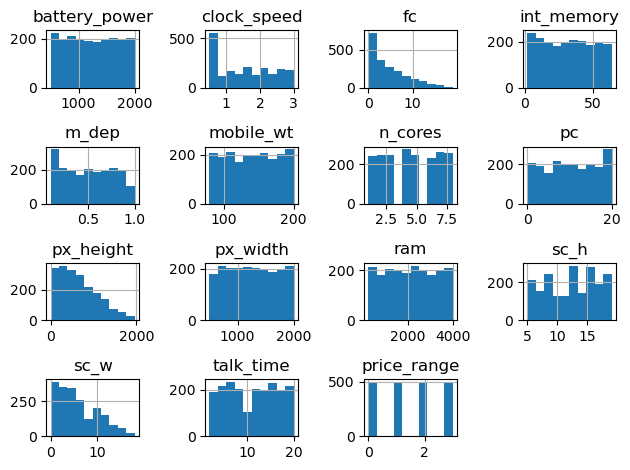

In [8]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_mobile.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

* Variables like fc, px_height and sc_w are right skewed and reaming are normally distributed

In [9]:
class_frequency = df_mobile.price_range.value_counts()
class_frequency

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

* So the target variables has equal number of observation

#### Correlation

In [11]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df_mobile.corr()

# print the correlation matrix
corrmat

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


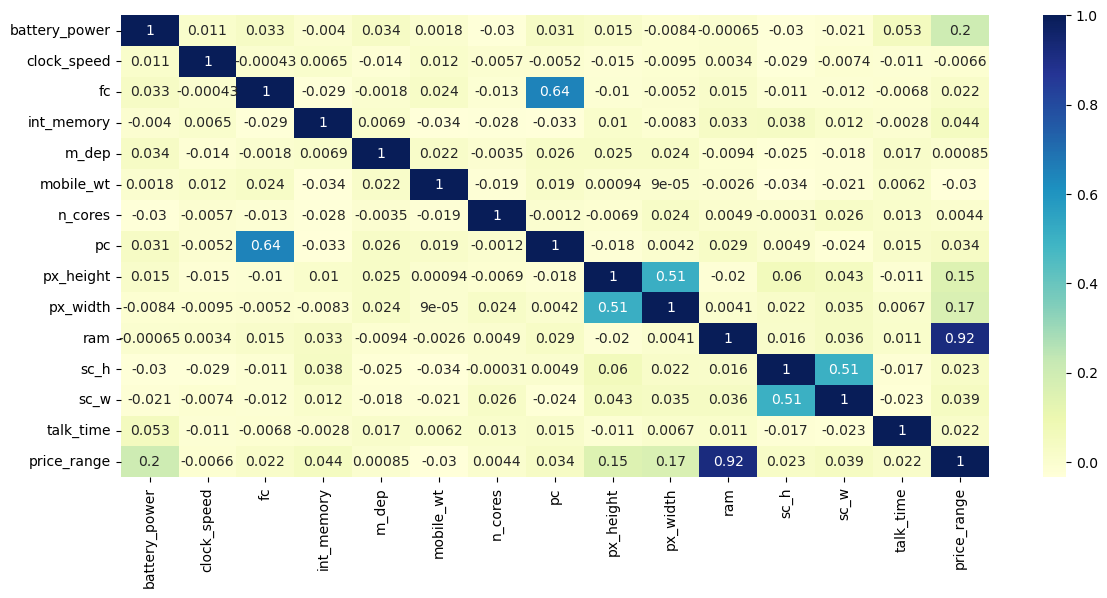

In [31]:
plt.figure(figsize = (14, 6))
sns.heatmap(corrmat, cmap = 'YlGnBu', annot = True)

# display the plot
plt.show()

* As we can observed that as price range is highly dependant on ram. 

Checking for Outliers

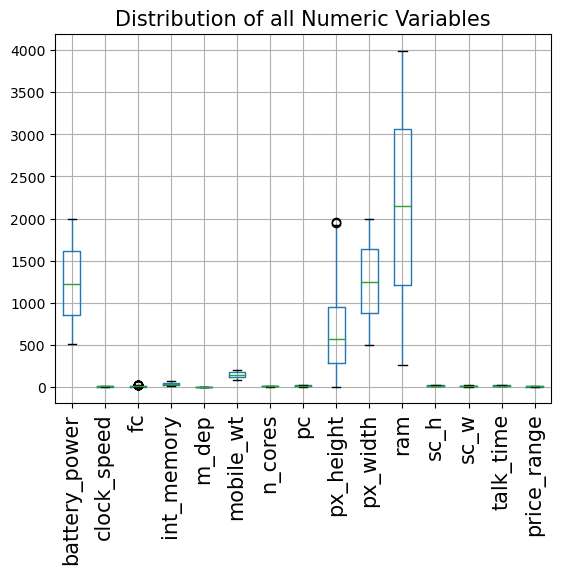

In [17]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_mobile.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**We can see that only 'fc' and 'px_height' have a few outliers. But they are not visible clearly. So we will plot separate boxplots for these two. Otherwise all the other variables do not have any outliers**

In [33]:
df_mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

<Axes: title={'center': 'Box plot for Price Range and RAM'}, xlabel='ram', ylabel='price_range'>

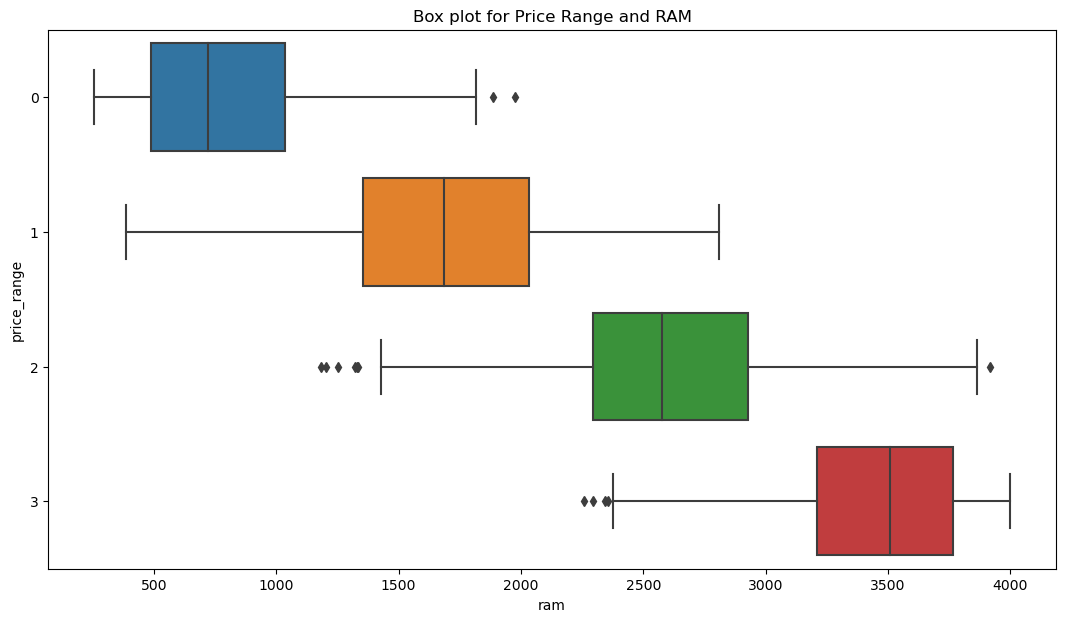

In [34]:
plt.figure(figsize=(13, 7))

plt.title('Box plot for Price Range and RAM')
sns.boxplot(y = 'price_range', x = 'ram', data = df_mobile, orient = 'h')

<Axes: title={'center': 'Box plot for Price Range and Mobile Weight'}, xlabel='battery_power', ylabel='price_range'>

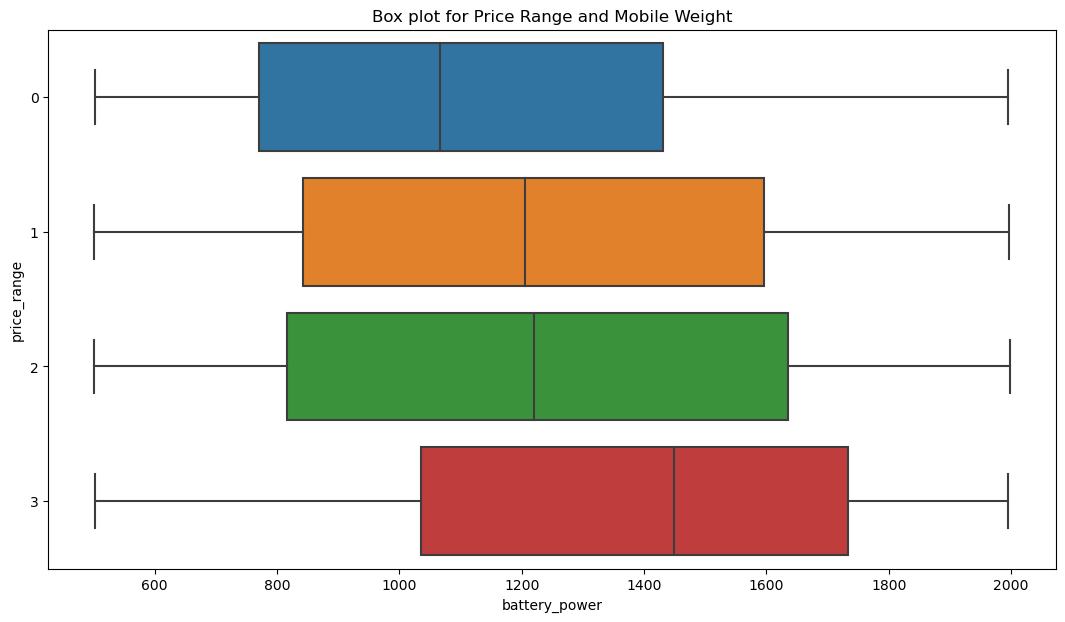

In [36]:
plt.figure(figsize=(13, 7))

plt.title('Box plot for Price Range and Mobile Weight')
sns.boxplot(y = 'price_range', x = 'battery_power', data = df_mobile, orient = 'h')

<Figure size 1800x700 with 0 Axes>

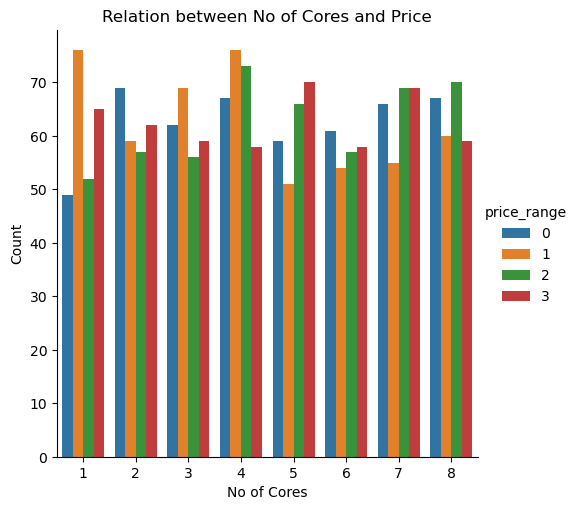

In [38]:
# Relation between Gender and Smoker

plt.figure(figsize=(18, 7))
sns.catplot(x = 'n_cores', kind = 'count', hue = 'price_range', data = df_mobile)
plt.xlabel('No of Cores')
plt.ylabel('Count')
plt.title('Relation between No of Cores and Price')
plt.show()

#### Feature Selection

In [39]:
from sklearn.feature_selection import chi2

In [40]:
X = df_mobile.drop('price_range', axis=1)
y = df_mobile['price_range']

In [41]:
f_score = chi2(X,y)
f_score

(array([1.41298666e+04, 6.48365906e-01, 1.01351665e+01, 8.98391244e+01,
        7.45819631e-01, 9.59728626e+01, 9.09755558e+00, 9.18605355e+00,
        1.73635695e+04, 9.81058675e+03, 9.31267519e+05, 9.61487832e+00,
        1.64803191e+01, 1.32364000e+01]),
 array([0.00000000e+00, 8.85276201e-01, 1.74514323e-02, 2.37197834e-19,
        8.62377379e-01, 1.14084978e-20, 2.80215610e-02, 2.69167984e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.21401351e-02,
        9.03765912e-04, 4.15229208e-03]))

In [42]:
p_value = pd.Series(f_score[1], X.columns)
p_value

battery_power    0.000000e+00
clock_speed      8.852762e-01
fc               1.745143e-02
int_memory       2.371978e-19
m_dep            8.623774e-01
mobile_wt        1.140850e-20
n_cores          2.802156e-02
pc               2.691680e-02
px_height        0.000000e+00
px_width         0.000000e+00
ram              0.000000e+00
sc_h             2.214014e-02
sc_w             9.037659e-04
talk_time        4.152292e-03
dtype: float64

In [43]:
irr_cols=[]
for x in p_value.index:
    if p_value[x]<=0.05:
        print(x, ':-Reject the null hypothesis')
    else:
        print(x, ':-Accept the null hypothesis')
        irr_cols.append(x)

battery_power :-Reject the null hypothesis
clock_speed :-Accept the null hypothesis
fc :-Reject the null hypothesis
int_memory :-Reject the null hypothesis
m_dep :-Accept the null hypothesis
mobile_wt :-Reject the null hypothesis
n_cores :-Reject the null hypothesis
pc :-Reject the null hypothesis
px_height :-Reject the null hypothesis
px_width :-Reject the null hypothesis
ram :-Reject the null hypothesis
sc_h :-Reject the null hypothesis
sc_w :-Reject the null hypothesis
talk_time :-Reject the null hypothesis


In [44]:
df_mobile.drop(irr_cols, axis=1, inplace=True)

In [45]:
df_mobile.shape

(2000, 13)

In [48]:
X = df_mobile.drop('price_range', axis = 1) # Features
y = df_mobile.price_range                   # Target

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [51]:
reg.fit(X_train, y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
#let us get the predictions using the classifier we had fit above
y_pred = reg.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       110
           1       0.58      0.59      0.58       122
           2       0.55      0.43      0.48       143
           3       0.67      0.83      0.74       125

    accuracy                           0.66       500
   macro avg       0.67      0.68      0.67       500
weighted avg       0.66      0.66      0.66       500



## K-Nearest Neighbor

In [55]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [56]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [59]:
accuracy_score(y_pred, y_test)

0.924

In [63]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(3, 16, 2)
test_accuracy =np.empty(len(neighbors))
train_accuracy =np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [64]:
print(test_accuracy)

[0.914 0.924 0.924 0.932 0.932 0.93  0.936]


In [66]:
print(train_accuracy)

[0.964      0.962      0.94866667 0.95466667 0.956      0.95133333
 0.95066667]


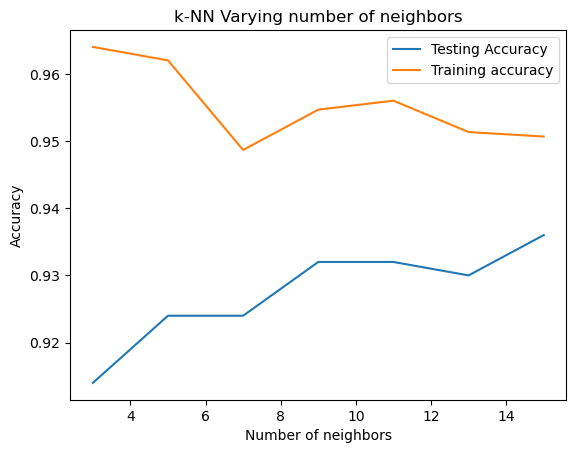

In [65]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [67]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=13)

In [68]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [69]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [70]:
accuracy_score(y_pred, y_test)

0.93

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       110
           1       0.90      0.92      0.91       122
           2       0.91      0.88      0.90       143
           3       0.95      0.95      0.95       125

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



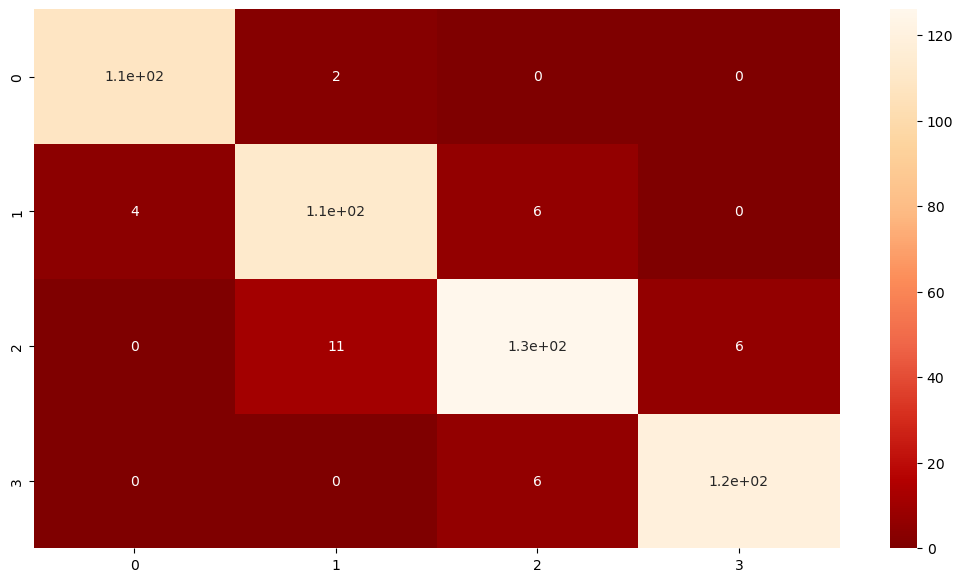

In [72]:
## Plotting Confusion Matrix
plt.figure(figsize=(13, 7))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'OrRd_r')
plt.show()